In [1]:
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization

In [2]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [15]:
import os
def plot_imgs(directory, top=10):
    all_item_dirs = os.listdir(directory)
    item_files = [os.path.join(directory, file) for file in all_item_dirs][:5]
  
    plt.figure(figsize=(20, 20))
  
    for i, img_path in enumerate(item_files):
        plt.subplot(10, 10, i+1)
    
        img = plt.imread(img_path)
        plt.tight_layout()         
        plt.imshow(img, cmap='gray') 

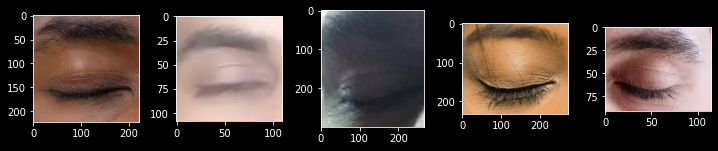

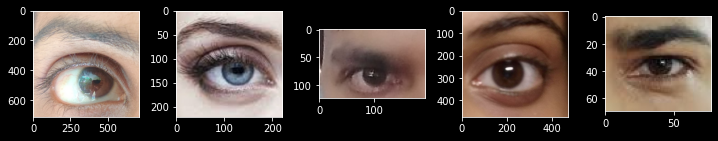

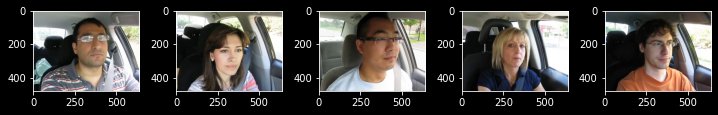

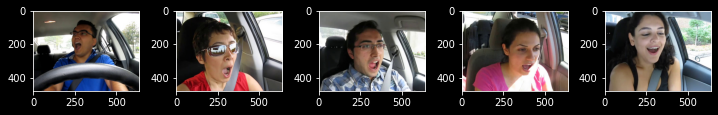

In [16]:
data_path = '../input/yawn-eye-dataset-new/dataset_new/train'

directories = ['/Closed', '/Open', '/no_yawn', '/yawn']

for j in directories:
    plot_imgs(data_path+j)

In [17]:
batch_size = 32
train_datagen = ImageDataGenerator(horizontal_flip = True, 
                                  rescale = 1./255, 
                                  zoom_range = 0.2, 
                                  validation_split = 0.1)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [18]:
train_data_path = '../input/yawn-eye-dataset-new/dataset_new/train'
test_data_path = '../input/yawn-eye-dataset-new/dataset_new/test'

In [19]:
train_set = train_datagen.flow_from_directory(train_data_path, target_size = (256,256),
                                              batch_size = batch_size, 
                                              color_mode = 'grayscale',
                                              class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(test_data_path, target_size = (256,256),
                                              batch_size = batch_size, 
                                              color_mode = 'grayscale',
                                              class_mode = 'categorical')

Found 2467 images belonging to 4 classes.
Found 433 images belonging to 4 classes.


In [20]:
classes = 4

cnn = Sequential()
cnn.add(Conv2D(64, (3,3), padding = 'same', input_shape = (256,256,1), activation = 'relu'))
cnn.add(MaxPooling2D(pool_size = (2,2)))

cnn.add(Conv2D(128, (3,3), padding = 'same', activation = 'relu'))
cnn.add(MaxPooling2D(pool_size = (2,2)))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.25))
'''cnn.add(Conv2D(128,(3,3), padding='same', activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2))) 
cnn.add(BatchNormalization())
cnn.add(Dropout(0.25))'''

cnn.add(Flatten())

cnn.add(Dense(64, activation = 'relu',kernel_regularizer=tf.keras.regularizers.L1(0.01),
    activity_regularizer=tf.keras.regularizers.L2(0.01)))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.25))
cnn.add(Dense(classes, activation = 'softmax',kernel_regularizer=tf.keras.regularizers.L1(0.01),
    activity_regularizer=tf.keras.regularizers.L2(0.01)))

In [21]:
print(cnn.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 256, 256, 64)      640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 128)     73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 64, 64, 128)       0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 64, 64, 128)       512       
_________________________________________________________________
dropout_2 (Dropout)          (None, 64, 64, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 524288)           

In [22]:
model_path="driver_drowsiness.h5"

checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, 
                              save_best_only=True, mode='max')

callbacks_list = [checkpoint]

In [23]:
epochs = 10
training_steps=train_set.n//train_set.batch_size
validation_steps =test_set.n//test_set.batch_size

In [24]:
cnn.compile(loss = 'categorical_crossentropy',optimizer = 'adam' , metrics = ['accuracy'])

In [25]:
hist=cnn.fit(train_set, epochs=epochs, steps_per_epoch=training_steps,validation_data=test_set,
                    validation_steps=validation_steps, callbacks = callbacks_list)

Epoch 1/10
77/77 [==============================] - 360s 5s/step - loss: 132.9731 - accuracy: 0.3170 - val_loss: 43.8930 - val_accuracy: 0.4303

Epoch 00001: val_accuracy improved from -inf to 0.43029, saving model to driver_drowsiness.h5
Epoch 2/10
77/77 [==============================] - 366s 5s/step - loss: 42.2627 - accuracy: 0.6115 - val_loss: 41.6030 - val_accuracy: 0.3894

Epoch 00002: val_accuracy did not improve from 0.43029
Epoch 3/10
77/77 [==============================] - 369s 5s/step - loss: 41.0673 - accuracy: 0.6772 - val_loss: 42.6206 - val_accuracy: 0.2596

Epoch 00003: val_accuracy did not improve from 0.43029
Epoch 4/10
77/77 [==============================] - 353s 5s/step - loss: 40.6055 - accuracy: 0.6985 - val_loss: 40.4006 - val_accuracy: 0.2620

Epoch 00004: val_accuracy did not improve from 0.43029
Epoch 5/10
77/77 [==============================] - 346s 4s/step - loss: 39.9275 - accuracy: 0.6542 - val_loss: 38.9890 - val_accuracy: 0.6587

Epoch 00005: val_acc

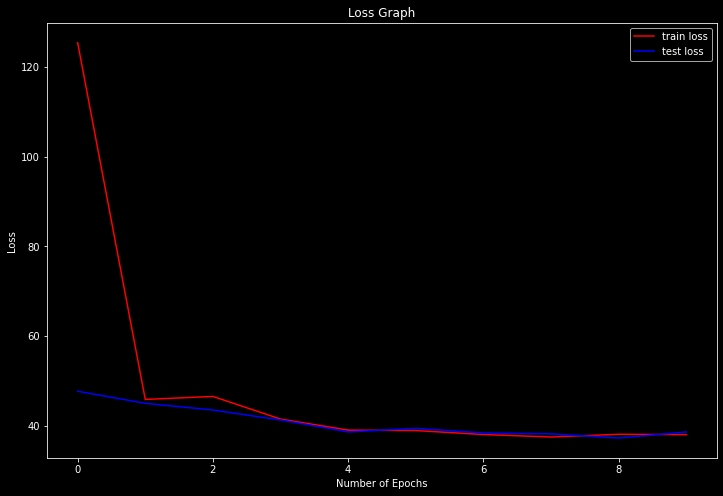

In [70]:
plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'],'r',label='train loss')
plt.plot(hist.history['val_loss'],'b',label='test loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.title('Loss Graph')
plt.legend();

In [27]:
cnn.compile(loss = 'categorical_crossentropy',optimizer = 'nadam' , metrics = ['accuracy'])

In [28]:
hist=cnn.fit(train_set, epochs=epochs, steps_per_epoch=training_steps,validation_data=test_set,
                    validation_steps=validation_steps, callbacks = callbacks_list)

Epoch 1/10
77/77 [==============================] - 330s 4s/step - loss: 119.7542 - accuracy: 0.4940 - val_loss: 101.1325 - val_accuracy: 0.2500

Epoch 00001: val_accuracy improved from -inf to 0.25000, saving model to driver_drowsiness.h5
Epoch 2/10
77/77 [==============================] - 327s 4s/step - loss: 93.7062 - accuracy: 0.6850 - val_loss: 91.0137 - val_accuracy: 0.3197

Epoch 00002: val_accuracy improved from 0.25000 to 0.31971, saving model to driver_drowsiness.h5
Epoch 3/10
77/77 [==============================] - 326s 4s/step - loss: 93.7699 - accuracy: 0.6912 - val_loss: 95.7691 - val_accuracy: 0.5841

Epoch 00003: val_accuracy improved from 0.31971 to 0.58413, saving model to driver_drowsiness.h5
Epoch 4/10
77/77 [==============================] - 333s 4s/step - loss: 93.8868 - accuracy: 0.6920 - val_loss: 92.8411 - val_accuracy: 0.2524

Epoch 00004: val_accuracy did not improve from 0.58413
Epoch 5/10
77/77 [==============================] - 336s 4s/step - loss: 93.836

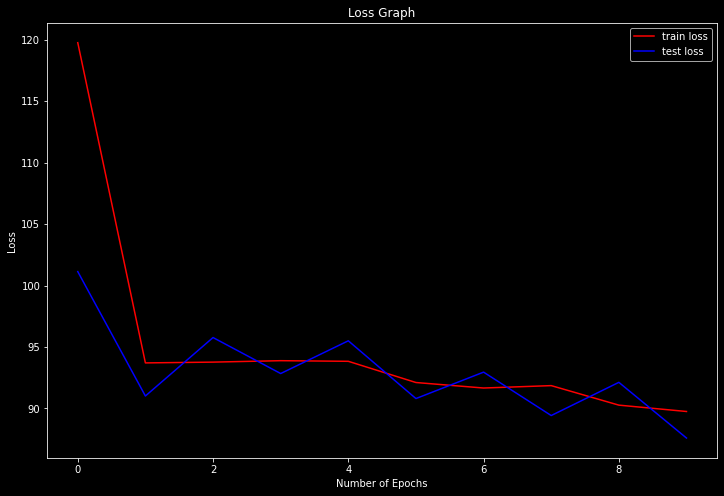

In [29]:
plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'],'r',label='train loss')
plt.plot(hist.history['val_loss'],'b',label='test loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.title('Loss Graph')
plt.legend();

In [13]:
cnn.compile(loss = 'categorical_crossentropy',optimizer = 'adamax' , metrics = ['accuracy'])

In [ ]:
hist_adamax=cnn.fit(train_set, epochs=epochs, steps_per_epoch=training_steps,validation_data=test_set,
                    validation_steps=validation_steps, callbacks = callbacks_list)

2022-12-15 02:54:18.401672: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
77/77 [==============================] - 306s 4s/step - loss: 117.5172 - accuracy: 0.4337 - val_loss: 29.5677 - val_accuracy: 0.2428

Epoch 00001: val_accuracy improved from -inf to 0.24279, saving model to driver_drowsiness.h5
Epoch 2/10
77/77 [==============================] - 300s 4s/step - loss: 27.5983 - accuracy: 0.5988 - val_loss: 28.5662 - val_accuracy: 0.2933

Epoch 00002: val_accuracy improved from 0.24279 to 0.29327, saving model to driver_drowsiness.h5
Epoch 3/10
77/77 [==============================] - 307s 4s/step - loss: 26.7612 - accuracy: 0.6665 - val_loss: 26.4009 - val_accuracy: 0.2596

Epoch 00003: val_accuracy did not improve from 0.29327
Epoch 4/10
77/77 [==============================] - 303s 4s/step - loss: 25.7250 - accuracy: 0.7158 - val_loss: 26.5245 - val_accuracy: 0.2404

Epoch 00004: val_accuracy did not improve from 0.29327
Epoch 5/10
77/77 [==============================] - 296s 4s/step - loss: 24.6407 - accuracy: 0.7339 - val_loss: 24.4917 - 

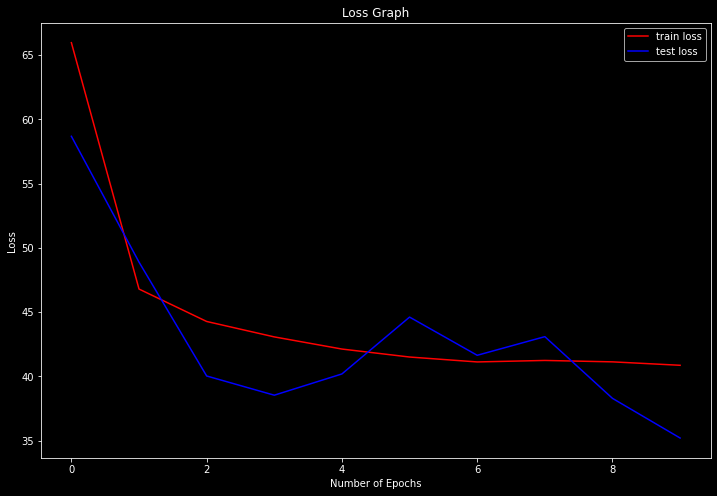

In [33]:
plt.figure(figsize=(12,8))
plt.plot(hist_adamax.history['loss'],'r',label='train loss')
plt.plot(hist_adamax.history['val_loss'],'b',label='test loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.title('Loss Graph')
plt.legend();

In [39]:
cnn.compile(loss = 'categorical_crossentropy',optimizer = 'RMSprop' , metrics = ['accuracy'])

In [40]:
hist=cnn.fit(train_set, epochs=epochs, steps_per_epoch=training_steps,validation_data=test_set,
                    validation_steps=validation_steps, callbacks = callbacks_list)

Epoch 1/10
77/77 [==============================] - 342s 4s/step - loss: 243.1844 - accuracy: 0.3491 - val_loss: 175.6314 - val_accuracy: 0.2476

Epoch 00001: val_accuracy did not improve from 0.79567
Epoch 2/10
77/77 [==============================] - 330s 4s/step - loss: 172.3903 - accuracy: 0.5881 - val_loss: 167.5712 - val_accuracy: 0.2572

Epoch 00002: val_accuracy did not improve from 0.79567
Epoch 3/10
77/77 [==============================] - 341s 4s/step - loss: 171.2662 - accuracy: 0.5979 - val_loss: 173.4478 - val_accuracy: 0.2524

Epoch 00003: val_accuracy did not improve from 0.79567
Epoch 4/10
77/77 [==============================] - 327s 4s/step - loss: 170.9372 - accuracy: 0.6107 - val_loss: 167.9337 - val_accuracy: 0.4303

Epoch 00004: val_accuracy did not improve from 0.79567
Epoch 5/10
77/77 [==============================] - 332s 4s/step - loss: 170.1969 - accuracy: 0.6353 - val_loss: 171.5135 - val_accuracy: 0.5264

Epoch 00005: val_accuracy did not improve from 0.7

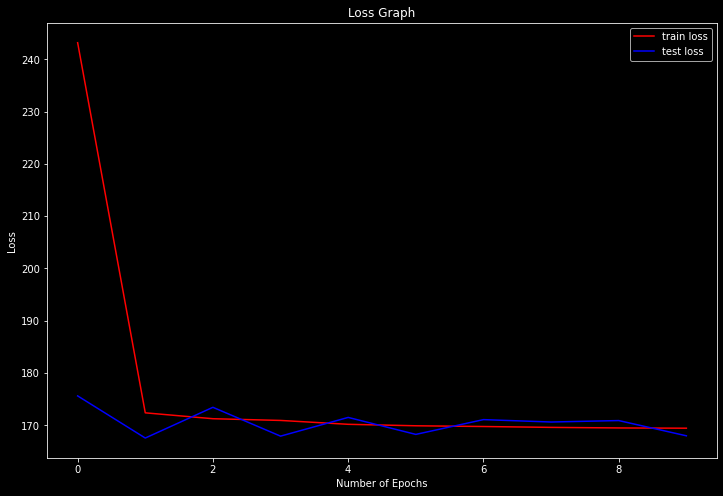

In [41]:
plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'],'r',label='train loss')
plt.plot(hist.history['val_loss'],'b',label='test loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.title('Loss Graph')
plt.legend();

In [26]:
cnn.compile(loss = 'categorical_crossentropy',optimizer = 'adagrad' , metrics = ['accuracy'])

In [27]:
hist_adagrad=cnn.fit(train_set, epochs=epochs, steps_per_epoch=training_steps,validation_data=test_set,
                    validation_steps=validation_steps, callbacks = callbacks_list)

Epoch 1/10
77/77 [==============================] - 302s 4s/step - loss: 269.4321 - accuracy: 0.6349 - val_loss: 59.8323 - val_accuracy: 0.3510

Epoch 00001: val_accuracy improved from -inf to 0.35096, saving model to driver_drowsiness.h5
Epoch 2/10
77/77 [==============================] - 299s 4s/step - loss: 16.3895 - accuracy: 0.6587 - val_loss: 7.9918 - val_accuracy: 0.4111

Epoch 00002: val_accuracy improved from 0.35096 to 0.41106, saving model to driver_drowsiness.h5
Epoch 3/10
77/77 [==============================] - 305s 4s/step - loss: 7.2625 - accuracy: 0.6838 - val_loss: 7.7410 - val_accuracy: 0.4760

Epoch 00003: val_accuracy improved from 0.41106 to 0.47596, saving model to driver_drowsiness.h5
Epoch 4/10
77/77 [==============================] - 304s 4s/step - loss: 7.3794 - accuracy: 0.6965 - val_loss: 7.8666 - val_accuracy: 0.5577

Epoch 00004: val_accuracy improved from 0.47596 to 0.55769, saving model to driver_drowsiness.h5
Epoch 5/10
77/77 [=========================

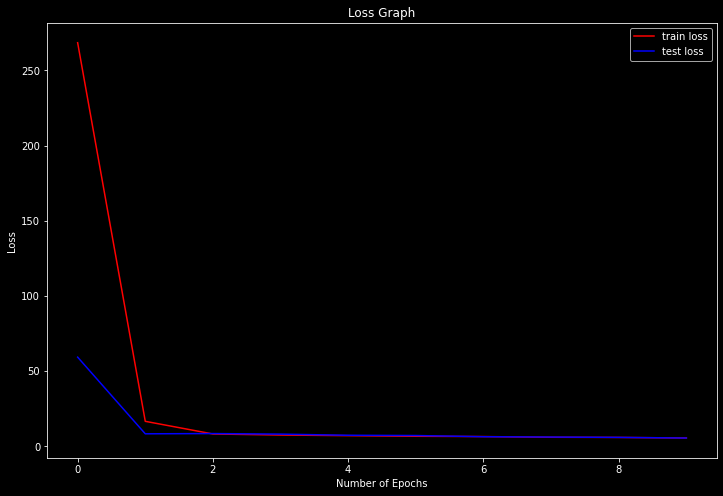

In [52]:
plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'],'r',label='train loss')
plt.plot(hist.history['val_loss'],'b',label='test loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.title('Loss Graph')
plt.legend();

In [ ]:
cnn.save(filepath='driver_drowsiness',save_format='h5')
cnn_model = load_model(filepath='driver_drowsiness.h5')
cnn_model

In [64]:
cnn.compile(loss = 'categorical_crossentropy',optimizer = 'sgd' , metrics = ['accuracy'])

In [65]:
hist=cnn.fit(train_set, epochs=epochs, steps_per_epoch=training_steps,validation_data=test_set,
                    validation_steps=validation_steps, callbacks = callbacks_list)

Epoch 1/10
77/77 [==============================] - 345s 4s/step - loss: 123.4501 - accuracy: 0.3306 - val_loss: 22.8025 - val_accuracy: 0.3029

Epoch 00001: val_accuracy improved from -inf to 0.30288, saving model to driver_drowsiness.h5
Epoch 2/10
77/77 [==============================] - 335s 4s/step - loss: 22.3760 - accuracy: 0.2912 - val_loss: 20.2223 - val_accuracy: 0.2500

Epoch 00002: val_accuracy did not improve from 0.30288
Epoch 3/10
77/77 [==============================] - 345s 5s/step - loss: 24.2038 - accuracy: 0.3380 - val_loss: 22.2917 - val_accuracy: 0.4688

Epoch 00003: val_accuracy improved from 0.30288 to 0.46875, saving model to driver_drowsiness.h5
Epoch 4/10
77/77 [==============================] - 339s 4s/step - loss: 19.9818 - accuracy: 0.5133 - val_loss: 19.7983 - val_accuracy: 0.4928

Epoch 00004: val_accuracy improved from 0.46875 to 0.49279, saving model to driver_drowsiness.h5
Epoch 5/10
77/77 [==============================] - 344s 4s/step - loss: 20.3089

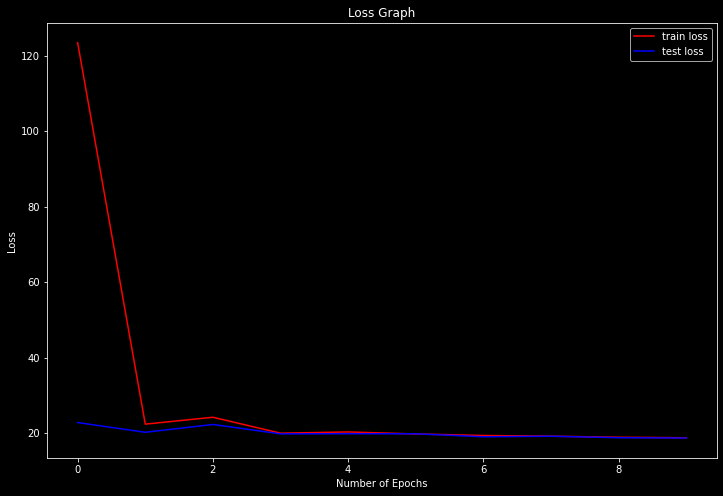

In [66]:
plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'],'r',label='train loss')
plt.plot(hist.history['val_loss'],'b',label='test loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.title('Loss Graph')
plt.legend();

In [ ]:
'''The optimizer with highest accuracy is adagrad, So, this optimizer can be used for prediction'''